## Import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cleaned_df = pd.read_csv('/content/drive/MyDrive/data_clear.csv')

In [ ]:
cleaned_df.shape

(976210, 7)

In [ ]:
cleaned_df.head()

,user_id,funnel_stage,timestamp,profit,os,add_channel,price
0,219687,interest,150000,NaN,android,banner,0.50
1,26717,consideration,150000,NaN,android,organic_traffic,0.00
2,793204,consideration,150000,NaN,android,video,0.75
3,111649,consideration,150000,NaN,android,video,0.75
4,991236,interest,150000,NaN,android,native,2.00


## DataPreparation

###1
Разделим данные на две группы
органический трафик (прямые ссылки на сайт и поисковые переходы, за которые рекламодатель не платит);
рекламный трафик (всё остальное).

In [ ]:
ch_organic_df = cleaned_df[cleaned_df['add_channel'] == 'organic_traffic']

In [ ]:
ch_other_df = cleaned_df[cleaned_df['add_channel'] != 'organic_traffic']

##2
Сравните доли пользователей на каждом этапе воронки между двумя группами. Насколько статистически значимы отличия между долями? Примените знакомые вам статистические критерии (подсказка: можно рассмотреть критерий долей).

In [ ]:
precentage_organic = ch_organic_df[['user_id','funnel_stage']].groupby(by = 'funnel_stage').count().reset_index()


In [ ]:
precentage_organic.head()

,funnel_stage,user_id
0,consideration,53592
1,intent,9095
2,interest,78064
3,purchase,542


In [ ]:
precentage_other = ch_other_df[['user_id','funnel_stage']].groupby(by = 'funnel_stage').count().reset_index()

In [ ]:
precentage_other.head()

,funnel_stage,user_id
0,consideration,284695
1,intent,40884
2,interest,505046
3,purchase,4292


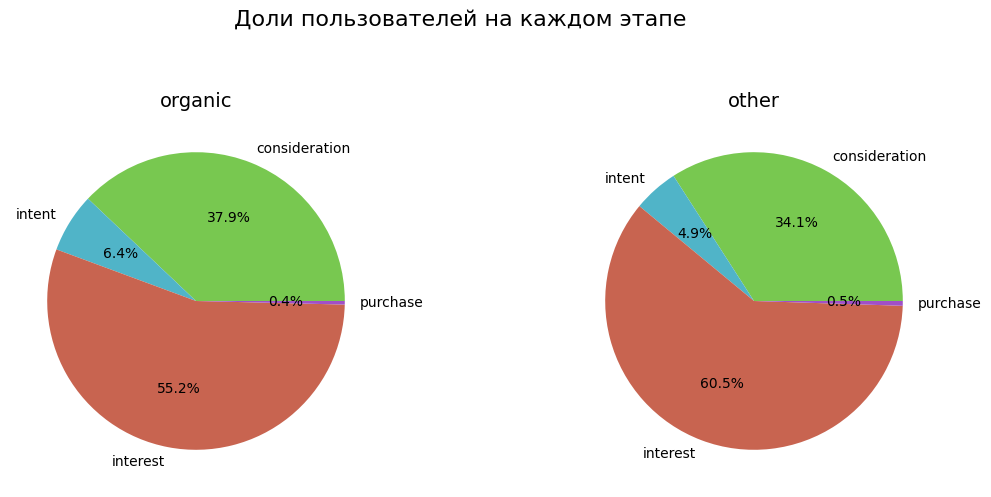

In [ ]:
colors = ['#78c850', '#50b4c8', '#c86450' ,'#a050c8']


# Создание объекта графика и осей
fig, ax = plt.subplots(1, 2, figsize=(12,6))
# Название всего фрейма
fig.suptitle('Доли пользователей на каждом этапе', fontsize=16)
# Отодвигаем графики друг от друга
fig.subplots_adjust(wspace=0.5)

# пайчарт organic
ax[0].pie(precentage_organic['user_id'], labels = precentage_organic['funnel_stage'], colors = colors ,autopct='%.1f%%')
# Заголовок
ax[0].set_title('organic', fontsize=14)

# пайчарт other
ax[1].pie(precentage_other['user_id'], labels = precentage_other['funnel_stage'],colors = colors , autopct='%.1f%%')
# Заголовок
ax[1].set_title('other', fontsize=14)

plt.show()

In [ ]:
# pearson test
alpha = 0.95
res = st.pearsonr(precentage_organic['user_id'], precentage_other['user_id'])
res

PearsonRResult(statistic=0.9923731550505466, pvalue=0.007626844949453426)

In [ ]:
# находим доли
organic_total = precentage_organic['user_id'].sum()
other_toatal = precentage_other['user_id'].sum()
x = precentage_organic['user_id'].apply(lambda x: x/organic_total)
y = precentage_other['user_id'].apply(lambda x: x/other_toatal)
#test chisquare
res =st.chisquare(y, x)
res

Power_divergenceResult(statistic=0.01296993098739662, pvalue=0.9996086763460295)

Тест пирсона statistic=0.99 связь высокая, pvalue=0.007 < alpha при этом выборки равны.
Тест ХиКвадрат pvalue=0.99 поэтому отвергаем нулевую гипотезу о том что признаки не равны. Статистистически значимая разница существует.

##3
Воронки для каждого канала коммуникации. Лучший и худший каналы по данным на этапах consideration, intent, purchase.

### groupby

In [ ]:
cr_channel_df = ch_other_df[['user_id','funnel_stage','add_channel']].groupby(by = ['add_channel','funnel_stage']).count().reset_index()
cr_channel_df.shape

(24, 3)

In [ ]:
cr_channel_df.head(20)

,add_channel,funnel_stage,user_id
0,banner,consideration,47540
1,banner,intent,7566
2,banner,interest,91282
3,banner,purchase,688
4,native,consideration,12597
5,native,intent,409
6,native,interest,19229
7,native,purchase,37
8,partner_network,consideration,24720
9,partner_network,intent,4378


In [ ]:
sorted_dict = {'interest':1, 'consideration':2, 'intent':3, 'purchase':4}

In [ ]:
cr_channel_df['order'] = cr_channel_df['funnel_stage'].apply(lambda x: sorted_dict.get(x))

In [ ]:
cr_channel_df.head(20)

,add_channel,funnel_stage,user_id,order
0,banner,consideration,47540,2
1,banner,intent,7566,3
2,banner,interest,91282,1
3,banner,purchase,688,4
4,native,consideration,12597,2
5,native,intent,409,3
6,native,interest,19229,1
7,native,purchase,37,4
8,partner_network,consideration,24720,2
9,partner_network,intent,4378,3


In [ ]:
cr_channel_df.sort_values(by=['add_channel','order'], inplace=True)
cr_channel_df.head(20)

,add_channel,funnel_stage,user_id,order
2,banner,interest,91282,1
0,banner,consideration,47540,2
1,banner,intent,7566,3
3,banner,purchase,688,4
6,native,interest,19229,1
4,native,consideration,12597,2
5,native,intent,409,3
7,native,purchase,37,4
10,partner_network,interest,65740,1
8,partner_network,consideration,24720,2


In [ ]:
cr_channel_df['conversion_rate'] = cr_channel_df['user_id'] / cr_channel_df['user_id'].shift(1)

In [ ]:
cr_channel_df.head(20)

,add_channel,funnel_stage,user_id,order,conversion_rate
2,banner,interest,91282,1,NaN
0,banner,consideration,47540,2,0.520804
1,banner,intent,7566,3,0.159150
3,banner,purchase,688,4,0.090933
6,native,interest,19229,1,27.949128
4,native,consideration,12597,2,0.655104
5,native,intent,409,3,0.032468
7,native,purchase,37,4,0.090465
10,partner_network,interest,65740,1,1776.756757
8,partner_network,consideration,24720,2,0.376027


In [ ]:
cr_channel_df.shape

(24, 5)

In [ ]:
cr_data = cr_channel_df[cr_channel_df['funnel_stage'] != 'interest'].drop('order', axis=1,)

In [ ]:
cr_data.head(20)

,add_channel,funnel_stage,user_id,conversion_rate
0,banner,consideration,47540,0.520804
1,banner,intent,7566,0.159150
3,banner,purchase,688,0.090933
4,native,consideration,12597,0.655104
5,native,intent,409,0.032468
7,native,purchase,37,0.090465
8,partner_network,consideration,24720,0.376027
9,partner_network,intent,4378,0.177104
11,partner_network,purchase,450,0.102787
12,rich,consideration,4657,0.526870


### Visualization

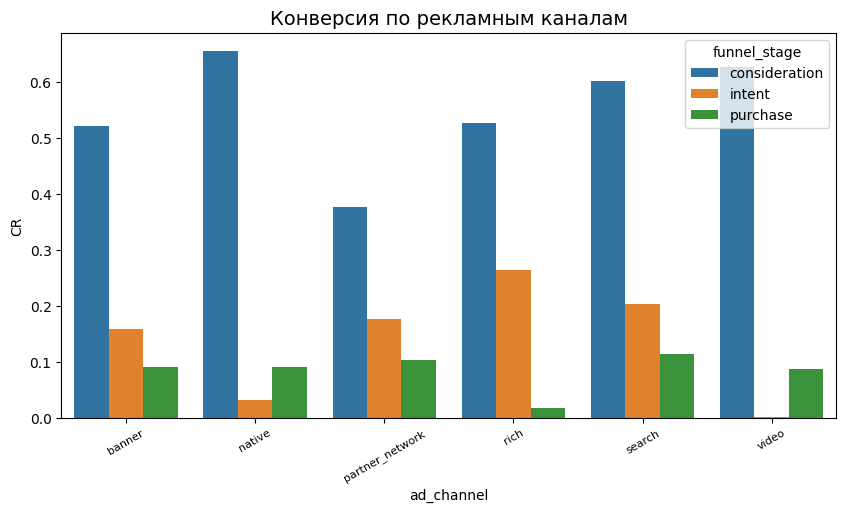

In [ ]:
# Задаем размер графика
plt.figure(figsize=(10,5))
# Рисуем линию
sns.barplot(x='add_channel', y='conversion_rate', data = cr_data, hue='funnel_stage')
# Заголовок
plt.title('Конверсия по рекламным каналам', fontsize=14)
# Поворачиваем подписи на оси x
plt.xticks(fontsize=8 ,rotation=30)
# Название оси X
plt.xlabel('ad_channel', fontsize=10)
# Название оси X
plt.ylabel('CR', fontsize=10)
plt.show()

### Сравенение CR на различных этапах

In [ ]:
# Сравенение конверсии на различных этапах
from ast import Assign
for i in cr_data['funnel_stage'].unique():
  print(f'Этап воронки: {i}')
  print(cr_data[cr_data['funnel_stage'] == i].sort_values(by = 'conversion_rate', ascending= False)[['add_channel','conversion_rate']][::5])


Этап воронки: consideration
       add_channel  conversion_rate
4           native         0.655104
8  partner_network         0.376027
Этап воронки: intent
   add_channel  conversion_rate
13        rich         0.264333
21       video         0.000936
Этап воронки: purchase
   add_channel  conversion_rate
19      search         0.113424
15        rich         0.017872


### Сравенение ROI для различных каналов

In [ ]:
ch_other_df.head()

,user_id,funnel_stage,timestamp,profit,os,add_channel,price
0,219687,interest,150000,NaN,android,banner,0.50
2,793204,consideration,150000,NaN,android,video,0.75
3,111649,consideration,150000,NaN,android,video,0.75
4,991236,interest,150000,NaN,android,native,2.00
5,387356,interest,150000,NaN,ios,search,1.50


In [ ]:
group_df = ch_other_df.groupby('add_channel').agg(user_count=('user_id', 'count'),
                                                  price=('price', 'sum'),
                                                  profit=('profit', 'sum')
                                                  ).reset_index()

In [ ]:
group_df['roi'] = group_df['profit'] / group_df['price']

In [ ]:
# Возврат инвестиций от рекламных каналов
group_df.sort_values(by = 'roi', ascending= False)

,add_channel,user_count,price,profit,roi
0,banner,147076,73538.0,497881.0,6.770391
2,partner_network,95288,95288.0,445411.0,4.674366
4,search,387532,581298.0,2112193.0,3.633580
3,rich,14749,36872.5,33511.0,0.908834
1,native,32272,64544.0,37355.0,0.578752
5,video,158000,118500.0,4582.0,0.038667


### Распределение прибыли по рекламным каналам

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


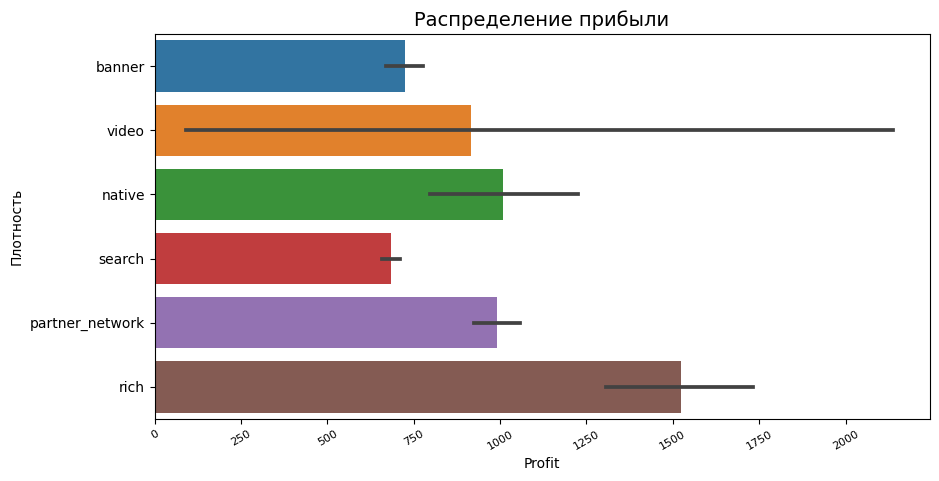

In [ ]:
# Проверим распределени прибыли на выбросы
plt.figure(figsize=(10,5))
sns.barplot(ch_other_df, x="profit", y ='add_channel')
# Заголовок
plt.title('Распределение прибыли', fontsize=14)
# Поворачиваем подписи на оси x
plt.xticks(fontsize=8 ,rotation=30)
# Название оси X
plt.xlabel('Profit', fontsize=10)
# Название оси X
plt.ylabel('Плотность', fontsize=10)
plt.show()

### Статистическое сравенение различных каналов продаж

In [ ]:
# Сравенение различных каналов продаж
rich_df = cleaned_df[cleaned_df['add_channel'] == 'banner']
video_df = cleaned_df[cleaned_df['add_channel'] == 'search']

precentage_rich = rich_df[['user_id','funnel_stage']].groupby(by = 'funnel_stage').count().reset_index()
precentage_video = video_df[['user_id','funnel_stage']].groupby(by = 'funnel_stage').count().reset_index()

# находим доли
sum_rich = precentage_rich['user_id'].sum()
sum_video = precentage_video['user_id'].sum()
x = precentage_rich['user_id'].apply(lambda x: x/sum_rich)
y = precentage_video['user_id'].apply(lambda x: x/sum_video)
#test chisquare
res =st.chisquare(y, x)
res

Power_divergenceResult(statistic=0.01424740418965859, pvalue=0.999549632638246)

## Conclusion

Тестирование показало: различия конверсий по рекламным каналам статистически значимы. Каналы с худшей конверсией partner_network, video rich. Для окончательно решения рассмотрим возврат инвестиций от рекламы. Наихудшим параметром обедает канал video 0.038667. Поэтому считаю целесообразным отказаться от канала video. Следует увеличить расходы на канал banner т. к. у него наивысший показатель возврата инвестиций. Необходимо проработать каналы rich у него высокий средний чек, но при этом низкая конверсия на этапе purchase возможно нужно скорректировать ц.а.  этого канала, например на пользователей ios также выявить возможные проблемы на последнем этапе воронки продаж. Канал partner_network сильное падение конверсии на этапе consideration необходимо проверить гипотезу о том, что некоторые площадки этого канала не работают.

In [ ]:
%%shell
#jupyter nbconvert --to html /content/drive/MyDrive/project_MU.ipynb